### Importación de librerías

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
import warnings
from sklearn.metrics import classification_report
import tensorflow as tf
import PIL

### Diccionario de categorías

In [7]:
MAP_FLOWERS = {
    0: 'daisy', 1: 'dandelion', 2: 'rose',
    3: 'sunflower', 4: 'tulip'
}

IMG_SIZE = 64

### Carga de datos

In [5]:
def load_train_set(dirname, map_pieces, verbose=True):
	X = []
	y = []
	for label, character in map_pieces.items():
		files = os.listdir(os.path.join(dirname, character))
		images = [file for file in files if file.endswith("jpg")]
		if verbose:
			print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
		for image_name in images:
			image = cv2.imread(os.path.join(dirname, character, image_name))
			X.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
			y.append(label)
	return np.array(X), np.array(y)

In [9]:
X, y = load_train_set("dataset-flores/train", MAP_FLOWERS)

Leyendo 501 imágenes encontradas de daisy
Leyendo 646 imágenes encontradas de dandelion
Leyendo 497 imágenes encontradas de rose
Leyendo 495 imágenes encontradas de sunflower
Leyendo 607 imágenes encontradas de tulip


### División de datos de entrenamiento y test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Permutación y normalización de imágenes

In [7]:
perm = np.random.permutation(len(X_train))
X_train, y_train = X_train[perm], y_train[perm]

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Análisis de los datos a utilizar

In [9]:
def visualize_example(x):
  plt.figure()
  plt.imshow(x)
  plt.colorbar()
  plt.grid(False)
  plt.show()

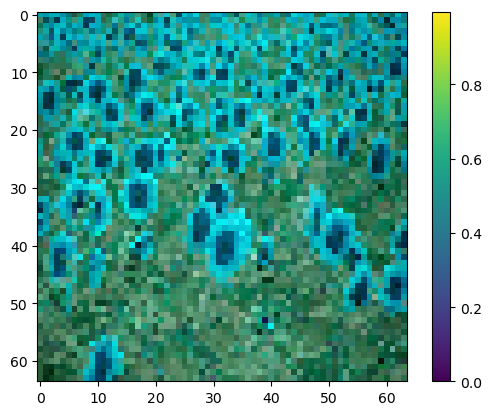

sunflower
(64, 64, 3)


In [10]:
visualize_example(X_train[75]) # Visualiza la imagen normalizada con valores de 0 a 1
print(MAP_FLOWERS[y_train[75]]) # Acceso al diccionario
print(X_train[75].shape[0:3]) # Dimensiones de la imagen tras resize con los 3 canales RGB

### Modelo

In [11]:
num_classes=5
epochs=5
img_rows,img_cols=IMG_SIZE,IMG_SIZE
input_shape=(img_rows,img_cols,3) #(64,64,3)

In [12]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [19]:
warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")

model = keras.Sequential([
  keras.layers.Conv2D(32, kernel_size=(3, 3), data_format="channels_last",input_shape=(64, 64, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.L1L2(l2=0.02)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(5, activation='softmax', kernel_regularizer=keras.regularizers.L1L2(l2=0.02))
])

model.compile(
  optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy']
)

history=model.fit(X_train, y_train, epochs=30, validation_split = 0.10)

Epoch 1/30
62/62 [==============================] - 3s 36ms/step - loss: 5.8812 - accuracy: 0.3143 - val_loss: 1.7563 - val_accuracy: 0.4318
Epoch 2/30
62/62 [==============================] - 2s 33ms/step - loss: 1.4920 - accuracy: 0.4504 - val_loss: 1.3556 - val_accuracy: 0.5000
Epoch 3/30
62/62 [==============================] - 2s 34ms/step - loss: 1.3424 - accuracy: 0.4782 - val_loss: 1.3099 - val_accuracy: 0.5091
Epoch 4/30
62/62 [==============================] - 2s 32ms/step - loss: 1.2240 - accuracy: 0.5466 - val_loss: 1.2809 - val_accuracy: 0.5818
Epoch 5/30
62/62 [==============================] - 2s 32ms/step - loss: 1.1828 - accuracy: 0.5703 - val_loss: 1.1606 - val_accuracy: 0.6409
Epoch 6/30
62/62 [==============================] - 2s 32ms/step - loss: 1.1566 - accuracy: 0.5987 - val_loss: 1.2978 - val_accuracy: 0.5909
Epoch 7/30
62/62 [==============================] - 2s 33ms/step - loss: 1.1561 - accuracy: 0.5820 - val_loss: 1.1081 - val_accuracy: 0.6545
Epoch 8/30
62

### Gráficas de precisión y pérdida

In [15]:
def plot_acc(history, title="Model Accuracy"):
  """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  
def plot_loss(history, title="Model Loss"):
  """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

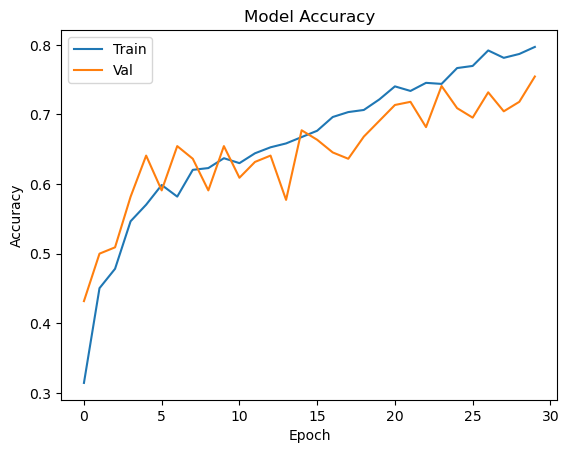

In [20]:
plot_acc(history)

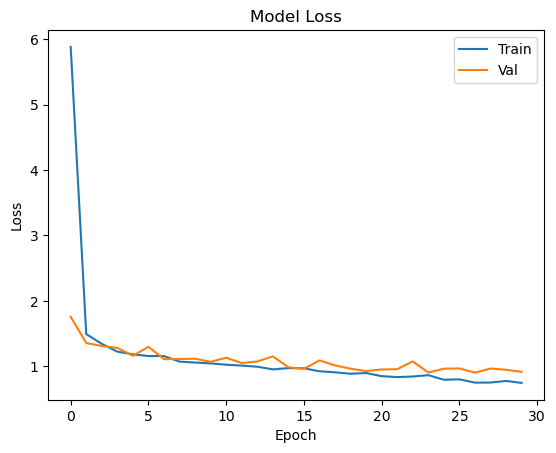

In [21]:
plot_loss(history)

### Evaluación y predicción con los datos de test

In [18]:
model.evaluate(X_test, y_test, batch_size=32, verbose=1)

18/18 [==============================] - 0s 10ms/step - loss: 1.0010 - accuracy: 0.7800


[1.0009891986846924, 0.7799999713897705]

In [92]:
prediccion=model.predict(X_test, batch_size=32, verbose=1)

18/18 [==============================] - 0s 10ms/step


In [94]:
y_test[5]

array([0., 0., 0., 0., 1.], dtype=float32)

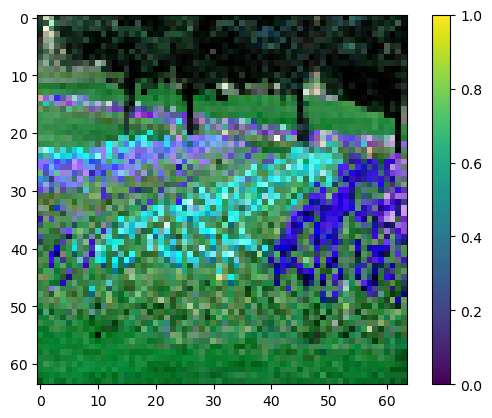

tulip
(64, 64, 3)


In [95]:
visualize_example(X_test[5]) # Visualiza la imagen normalizada con valores de 0 a 1
print(MAP_FLOWERS[np.argmax(y_test[5])]) # Acceso al diccionario
print(X_test[5].shape[0:3]) # Dimensiones de la imagen tras resize con los 3 canales RGB

In [96]:
print(MAP_FLOWERS[np.argmax(prediccion[5])])

tulip


In [97]:
informe = classification_report(np.argmax(y_test,axis=1), np.argmax(prediccion,axis=1))
print(informe)

              precision    recall  f1-score   support

           0       0.96      0.63      0.76       110
           1       0.65      0.92      0.76       118
           2       0.67      0.58      0.62       103
           3       0.86      0.76      0.80       103
           4       0.67      0.75      0.71       116

    accuracy                           0.73       550
   macro avg       0.76      0.73      0.73       550
weighted avg       0.76      0.73      0.73       550



### Guardamos el modelo

In [98]:
model.save('flores.h5')

C:\Users\Javi\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
